In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv', parse_dates = ['Date'])
sales = pd.read_csv('sales.csv', parse_dates = ['Date'])

/var/folders/bl/67k92kr94gs1_kqg1z0tc5hm0000gp/T/ipykernel_68141/597715040.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  features = pd.read_csv('features.csv', parse_dates = ['Date'])
/var/folders/bl/67k92kr94gs1_kqg1z0tc5hm0000gp/T/ipykernel_68141/597715040.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales = pd.read_csv('sales.csv', parse_dates = ['Date'])


# Exploratory Analysis

Below output indicates:
- Stores dataset has 3 fields with 45 non-null records.
- Features dataset has 12 fields with 8190 records. Some of the fields have null values which will require feature engineering
- Sales dataset has 4 fields all of which consists of non-null records.

In [18]:
print(stores.info())
print('\n')
print(features.info())
print('\n')
print(sales.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9  

Lets look at top 5 records from each dataset:

In [14]:
print(stores.head())
print('\n')
print(features.head())
print('\n')
print(sales.head())
print('\n')

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      Fal

-Looking at the top 5 values, we can say that both features and sales data are on weekly basis. Hence we can join data using Date and Store as keys. However to understand overall business performance, we will also group by date

-We will check min and max dates from both datasets to define the cut points

In [51]:
data = [['max', features.Date.max(), sales.Date.max()], ['min', features.Date.min(), sales.Date.min()]] 
df = pd.DataFrame(data, columns = ['max_min', 'Features', 'Sales'])
pritn(df)


,max_min,Features,Sales
0,max,2013-12-07,2012-12-10
1,min,2010-01-10,2010-01-10


In [206]:
#Lets merge features and sales dataset since both contain data on weekly basis
features_data = features[features['Date'].between('2010-01-10', '2012-12-10')]
sales_data = sales.groupby(['Date', 'Store']).Weekly_Revenue.sum().reset_index()
retail = features_data.merge(sales_data, on = ['Date', 'Store'], how = 'left')

ftr = features_data.groupby('Date').agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday":"sum"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean"}).reset_index()

sls_datewise = sales.groupby('Date').Weekly_Revenue.sum().reset_index()
cmp = ftr.merge(sls_datewise, on = 'Date', how = 'left')

print(cmp.info())
print(cmp[cmp.Weekly_Revenue.isnull()])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            149 non-null    datetime64[ns]
 1   Temperature     149 non-null    float64       
 2   Fuel_Price      149 non-null    float64       
 3   IsHoliday       149 non-null    int64         
 4   CPI             149 non-null    float64       
 5   Unemployment    149 non-null    float64       
 6   Weekly_Revenue  143 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 9.3 KB
None
          Date  Temperature  Fuel_Price  IsHoliday         CPI  Unemployment  \
105 2012-02-11    54.615556    3.676289          0  176.646352      6.953711   
127 2012-07-12    51.381333    3.477600          0  176.751255      6.953711   
136 2012-09-11    52.718889    3.603111          0  176.643222      6.953711   
145 2012-11-16    47.114444    3.5

In [150]:
cmp1 = cmp.dropna()
cmp1 = cmp1.set_index('Date')

In [151]:
print(sales.Weekly_Revenue.sum())
print(retail.Weekly_Revenue.sum())
print(cmp.Weekly_Revenue.sum())

6737218987.11
6737218987.110001
6737218987.11


In [152]:
#Lets display Revenue in Millions
cmp1['Weekly_Revenue'] = round((cmp1.Weekly_Revenue/1000000), 0).astype(int)

In [153]:
#Lets encode ISholiday to [0,1]
cmp1['IsHoliday'] = cmp1['IsHoliday'].apply(lambda x: 1 if x > 0 else 0)

In [154]:
cmp1.IsHoliday.value_counts()

0    133
1     10
Name: IsHoliday, dtype: int64

In [155]:
cmp1

,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment,Weekly_Revenue
Date,,,,,,
2010-01-10,69.868000,2.734333,0,168.354706,8.475289,42
2010-02-04,53.120889,2.827333,0,167.789036,8.497711,50
2010-02-07,77.133333,2.793511,0,167.982101,8.428578,49
2010-02-19,37.719778,2.672067,0,167.871686,8.619311,48
2010-02-26,39.243556,2.683933,0,167.909657,8.619311,44
...,...,...,...,...,...,...
2012-10-08,81.580222,3.632911,0,175.689620,7.237333,47
2012-10-19,60.705333,3.880000,0,176.652613,6.953711,45
2012-10-26,61.051111,3.791489,0,176.649482,6.953711,46


In [156]:
cmp1.describe()

,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment,Weekly_Revenue
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,60.663782,3.358607,0.069930,171.578394,7.999151,47.118881
std,15.172792,0.429401,0.255926,3.100148,0.483853,5.472710
min,30.480889,2.672067,0.000000,167.546485,6.953711,40.000000
25%,47.720222,2.885367,0.000000,168.408144,7.508333,45.000000
50%,61.051111,3.488644,0.000000,171.386189,8.150133,46.000000
75%,74.697333,3.726133,0.000000,174.724576,8.428578,48.000000
max,82.176444,3.997778,1.000000,176.652613,8.619311,81.000000


# Data Visualization

<Axes: title={'center': 'Unemployment'}, xlabel='Date'>

<Figure size 1500x400 with 0 Axes>

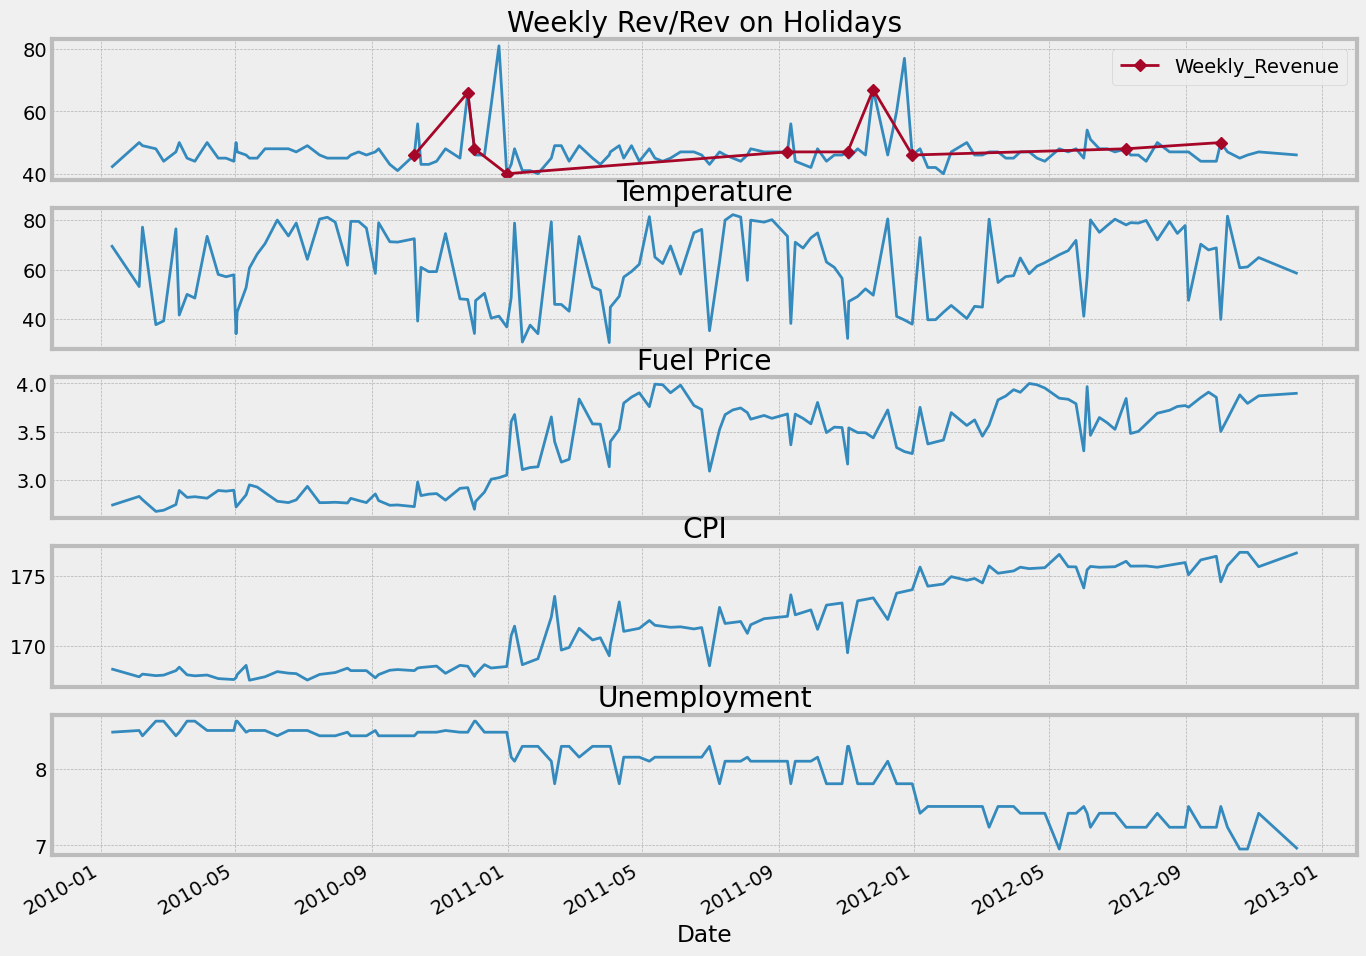

In [158]:

plt.style.use('bmh')
plt.figure(figsize=(15,4))
fig, ax = plt.subplots(5,1,figsize=(15,12),sharex=True) 
cmp1['Weekly_Revenue'].plot(ax=ax[0],title='Weekly Rev/Rev on Holidays')
cmp1[cmp1.IsHoliday==1]['Weekly_Revenue'].plot(marker="D",ax=ax[0],legend='Holiday Week Revenue')
cmp1['Temperature'].plot(ax=ax[1], title='Temperature')
cmp1['Fuel_Price'].plot(ax=ax[2],title='Fuel Price')
cmp1['CPI'].plot(ax=ax[3],title='CPI')
cmp1['Unemployment'].plot(ax=ax[4],title='Unemployment')

- Revenue wise pick can be detected on November and December months which tells us that highest sales occur on those months.

- Fuel Price & CPI have increased over time

- Unemployment decreased over time

- Fuel Price and CPI tends to be positively correlated.

- Unemployment and CPI tends to have negative correlation.

Lets create a heatmap to analyze the correlation between them

<Axes: >

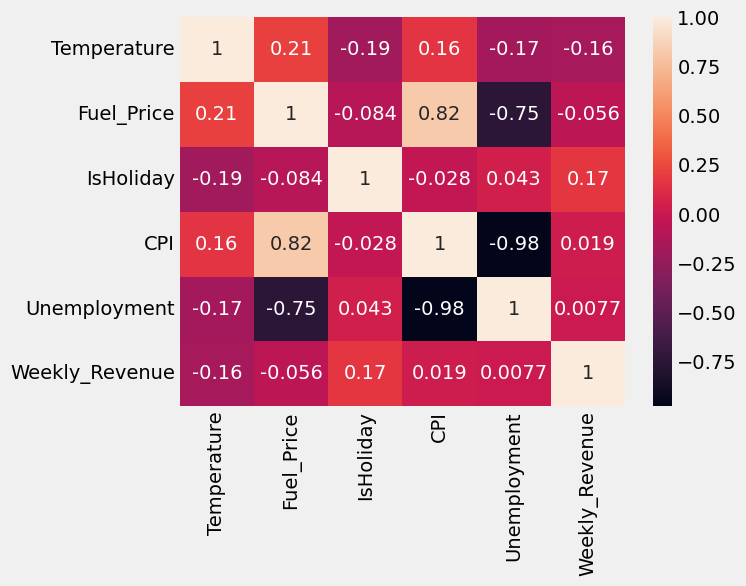

In [160]:
sns.heatmap(cmp1.corr(), annot = True)

- Looking at the correlation coefficients we can deduce there is a low correlation between Weekly Revenue and other variables.
- CPI and Fuel Price have a positive correlation.
- Unemployment is negatively correlated with CPI and Fuel Price

Text(0, 0.5, 'Revenue')

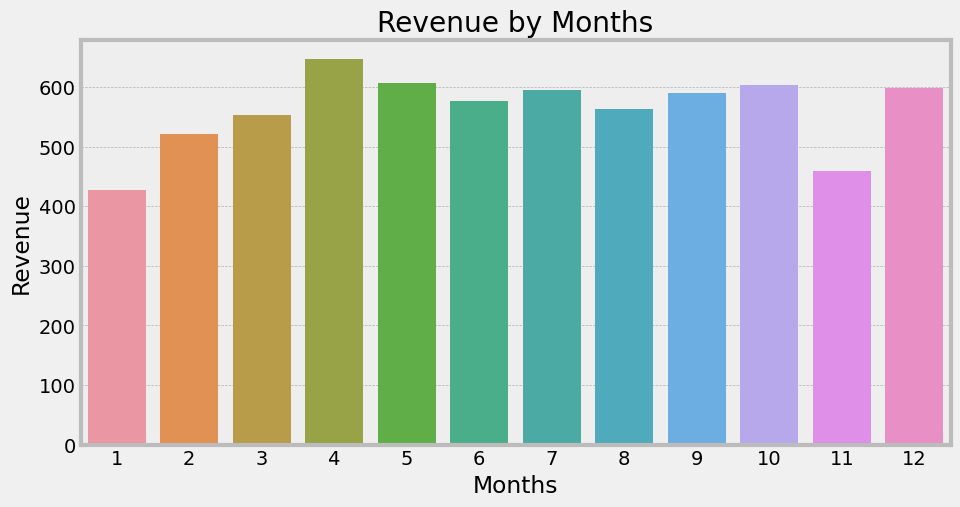

In [165]:
cmp_month = cmp1.groupby(cmp1.index.month).agg({'Weekly_Revenue': 'sum'})
plt.figure(figsize=(10, 5))
sns.barplot(x=cmp_month.index, y=cmp_month.Weekly_Revenue)
plt.title("Revenue by Months")
plt.xlabel("Months")
plt.ylabel("Revenue")

# Seasonality

Lets check seasonality

In [170]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(cmp1.Weekly_Revenue, period = 45)

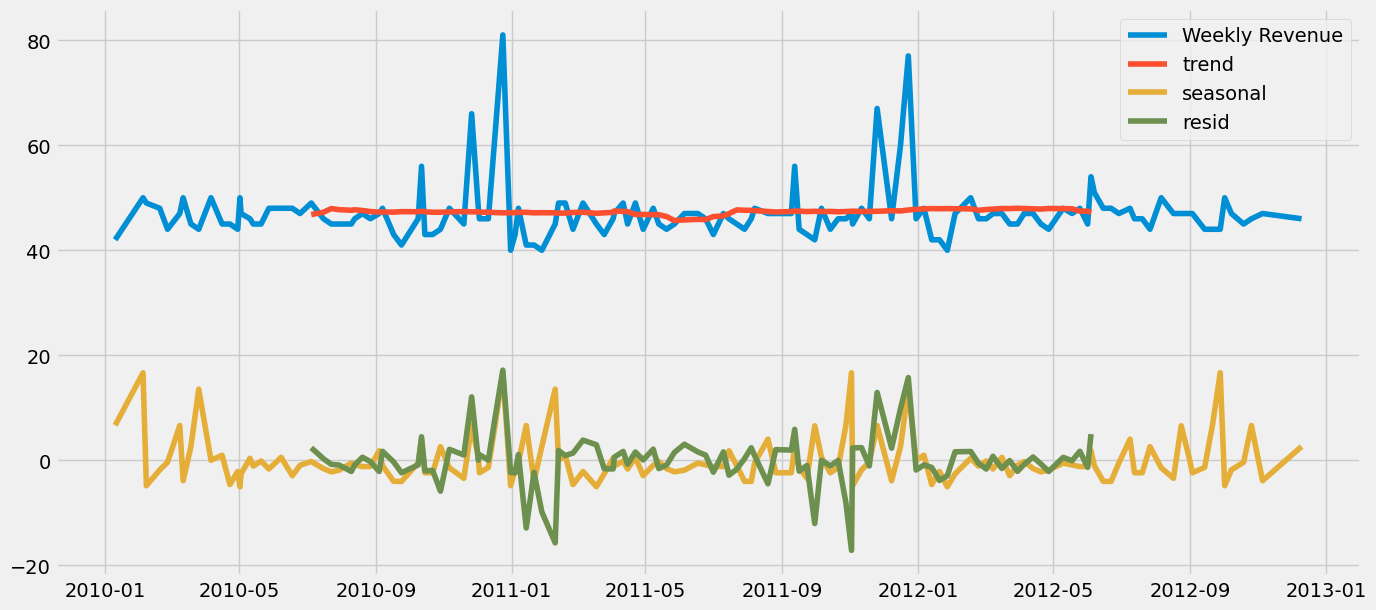

In [174]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 7))
plt.plot(cmp1.Weekly_Revenue)
plt.plot(decomposed.trend)
plt.plot(decomposed.seasonal)
plt.plot(decomposed.resid)

plt.legend(['Weekly Revenue', 'trend', 'seasonal', 'resid', 'original observation'], loc ='upper right') 


In the plot, you see the original data, then the trend, seasonality and residual. For each point in time 𝑖
, the original observation 𝑦𝑖
 is simply the addition of the three components, 𝑦𝑖=𝑡𝑖+𝑠𝑖+𝑒𝑖
. The decomposition algorithm ensures that the seasonal and the residual components vary around 0 - 5.

# Breakout by Stores

In [192]:
store_data = sales_data.groupby('Store').agg({'Weekly_Revenue':'sum'})
store_data.Weekly_Revenue = (store_data.Weekly_Revenue/1000000).astype(int)
#store_data.Weekly_Revenue = store_data.Weekly_Revenue.apply(int)
#store_data.set_index(['Store'], inplace=True)
#store_data = store_data.reset_index()
total = store_data.Weekly_Revenue.sum()
store_data['Rev Distribution'] = round((store_data.Weekly_Revenue/total), 2)
store_data.sort_values('Rev Distribution', ascending = False)

,Weekly_Revenue,Rev Distribution
Store,,
4,299,0.04
27,253,0.04
10,271,0.04
2,275,0.04
20,301,0.04
13,286,0.04
14,288,0.04
1,222,0.03
19,206,0.03


Text(0.5, 0, 'Stores')

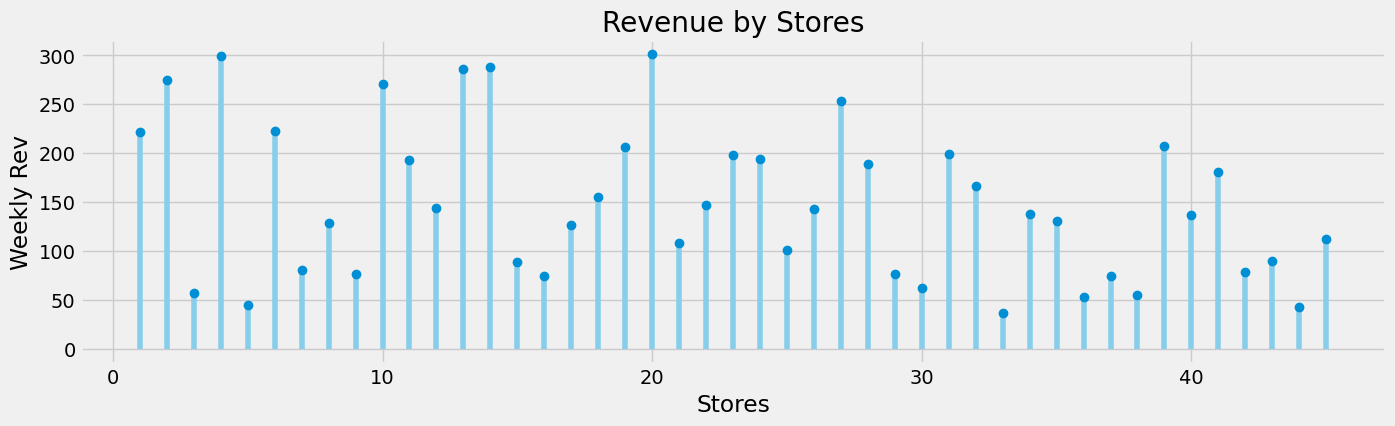

In [194]:
fig1, ax1 = plt.subplots(figsize=(15, 4))
#ordered_df = data_Dept.sort_values(by='Weekly_Sales')
plt.vlines(x=store_data.index, ymin=0, ymax=store_data['Weekly_Revenue'], color='skyblue')
plt.plot(store_data.index, store_data['Weekly_Revenue'], "o")
plt.title("Revenue by Stores")
plt.ylabel("Weekly Rev")
plt.xlabel("Stores")

- Stores 4, 2, 10, 13, 14, 27 & 20 have highest Revenue.

Text(0.5, 0, 'Date')

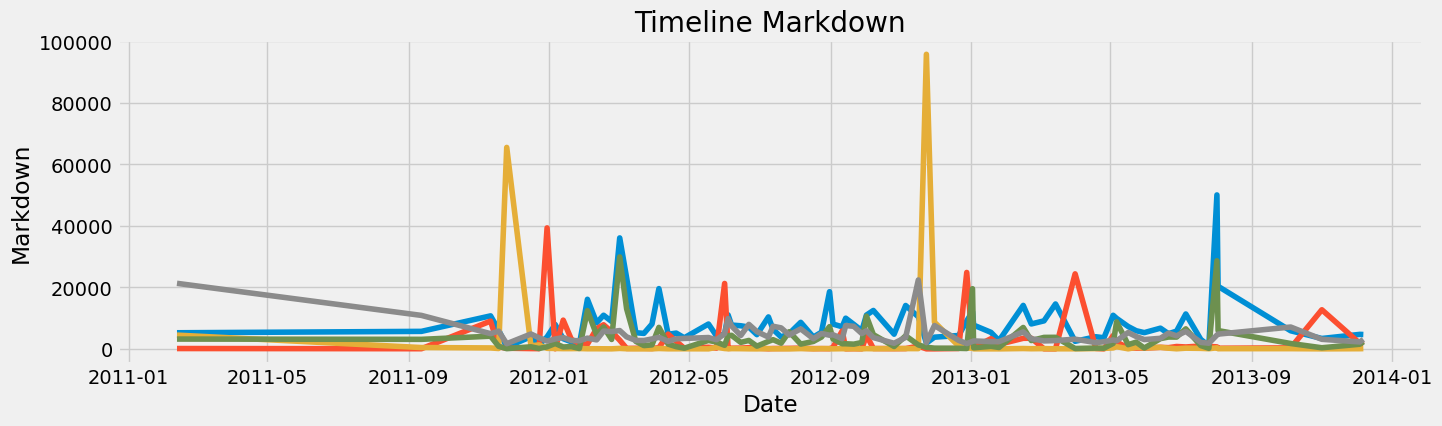

In [198]:
plt.figure(figsize=(15,4))
markdown = features[features.MarkDown2.notnull()]
markdown = markdown.groupby('Date').agg({'MarkDown1':'mean','MarkDown2':'mean','MarkDown3':'mean','MarkDown4':'mean','MarkDown5':'mean'})


plt.plot(markdown.index,markdown.MarkDown1)
plt.plot(markdown.index,markdown.MarkDown2)
plt.plot(markdown.index,markdown.MarkDown3)
plt.plot(markdown.index,markdown.MarkDown4)
plt.plot(markdown.index,markdown.MarkDown5)
plt.title('Timeline Markdown')
plt.ylabel("Markdown")
plt.xlabel("Date")

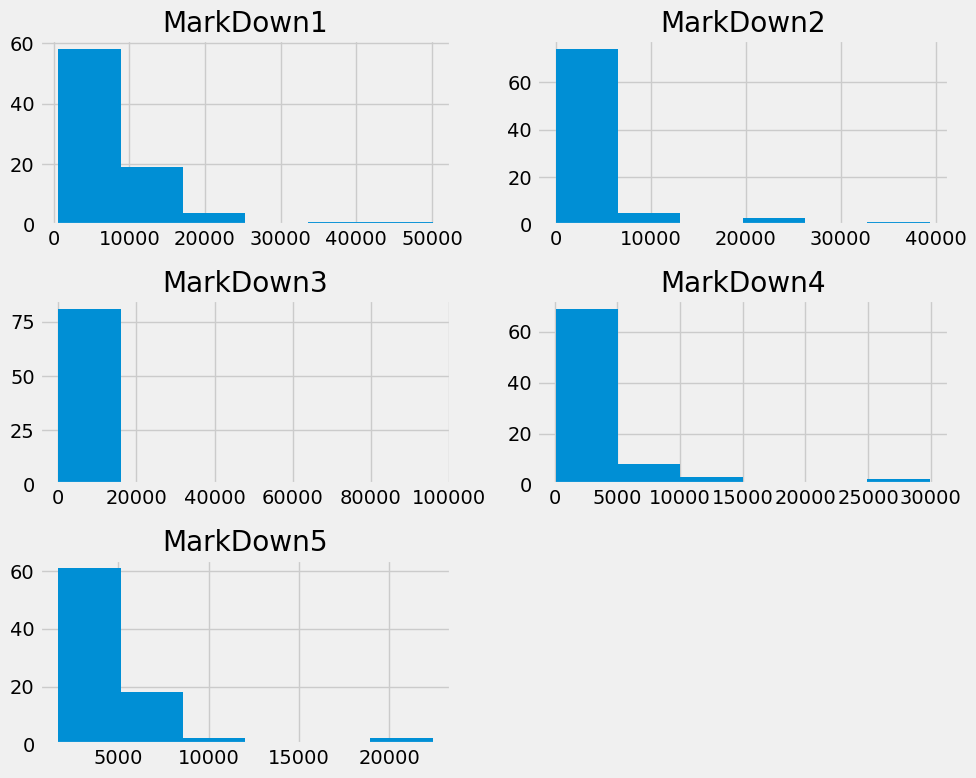

In [201]:
markdown.hist(figsize=(10,8),bins=6)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Markdown')

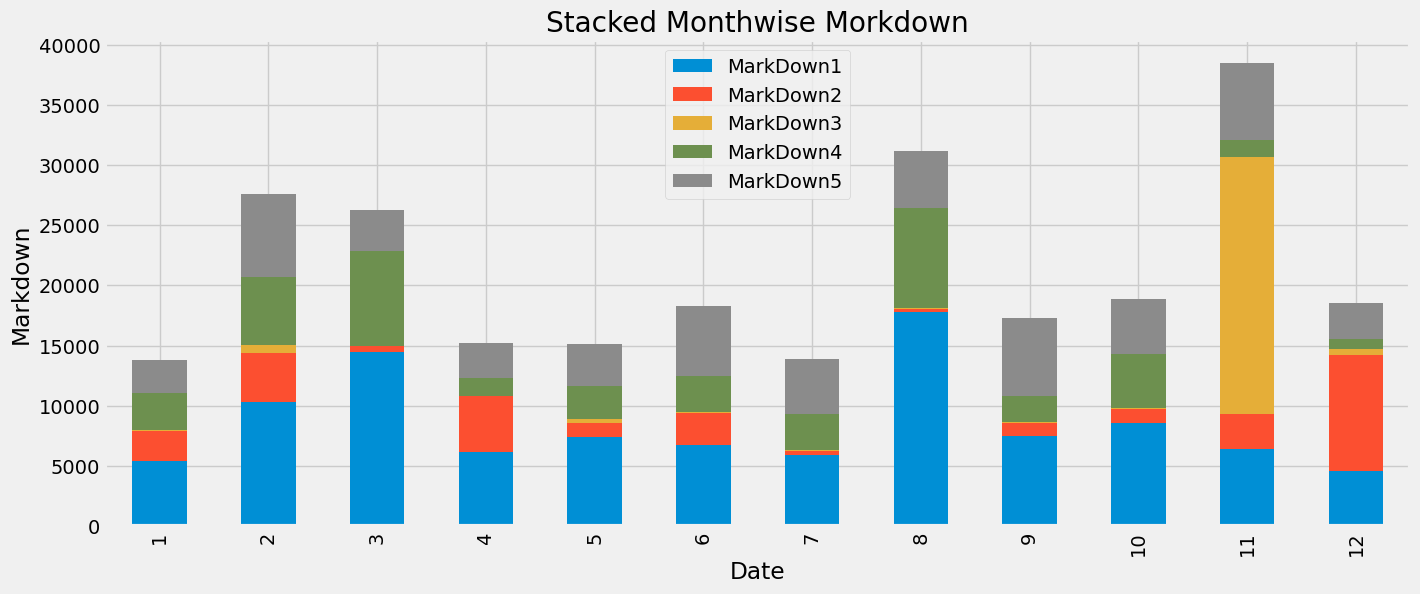

In [202]:
markdown_month = markdown.groupby(markdown.index.month).agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

markdown_month.plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Stacked Monthwise Morkdown")
plt.ylabel("Markdown")